<img src="Tp1.png">


# <center> <font color='#5a92e0'>Compte rendue TP2</font> </center>
## <center> <font color='#3676cf'>Image Segmantation</font> </center>
### Oumaima Ezzine 

# <font color='#8934eb'>I. Kmeans Clustering </font>


    a)Import all the needed packeges

In [ ]:
!pip3 install ipywidgets --user

In [ ]:
!pip3 install opencv-python --user

In [6]:
import numpy as np
import cv2 
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
from matplotlib import pyplot as plt
import matplotlib.image as mpimg 
from ipywidgets import interact, interactive
import ipywidgets as widgets

    b) Load the image
    c) Before we do anything, let's convert the image into RGB format
     d) We gonna use cv2.kmeans() function which takes a 2D array as input, and since our original image is 3D (width, height and depth of 3 RGB values), we need to flatten the height and width into a single vector of pixels (3 RGB values):

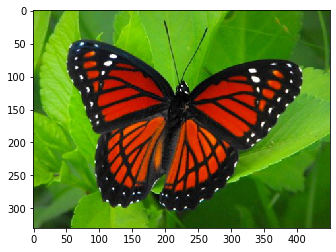

In [7]:
#originale
image = mpimg.imread('imgs/img.jpg')
imgplot = plt.imshow(image)
plt.show()


=====> If you look at the image, there are three main colors (green for leafs, red for the wings of the butterfly and black for wings contour). As a result, we gonna use three clusters for this image:
then perform k-means clustering with number of clusters defined as 3 also random centres are initally chosed for k-means clustering 

In [19]:
def segm(k):
    
    image = cv2.imread('imgs/img.jpg')
    (h1, w1) = image.shape[:2]

    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    image = image.reshape((image.shape[0] * image.shape[1], 3))

    #clt = KMeans(n_clusters = 4)
    clt = KMeans(n_clusters = k)

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

    #reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image  = image.reshape((h1, w1, 3))

    # convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image  = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
    plt.imshow(image)
    cv2.imwrite('ims/img3.jpg', quant)


    cv2.imread('imgs/img.jpg')
    cv2.waitKey(0)
    cv2.destroyAllWindows()

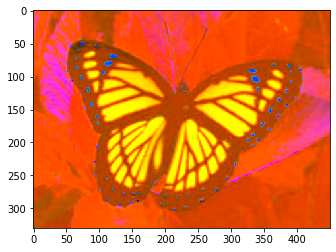

In [18]:
segm(3)

In [10]:
interact(segm, k=widgets.IntSlider(min=2, max=30, step=1, value=2));

interactive(children=(IntSlider(value=2, description='k', max=30, min=2), Output()), _dom_classes=('widget-int…

# <font color='red'>conclusion</font>
As we can see with an increase in the value of k, the image becomes clearer and distinct because the K-means algorithm can classify more classes/cluster of colors. K-means clustering works well when we have a small dataset. It can segment objects in images and also give better results. But when it is applied on large datasets (more number of images), it looks at all the samples in one iteration which leads to a lot of time being taken up. 

# <font color='#8934eb'>II. Adding Noise </font>

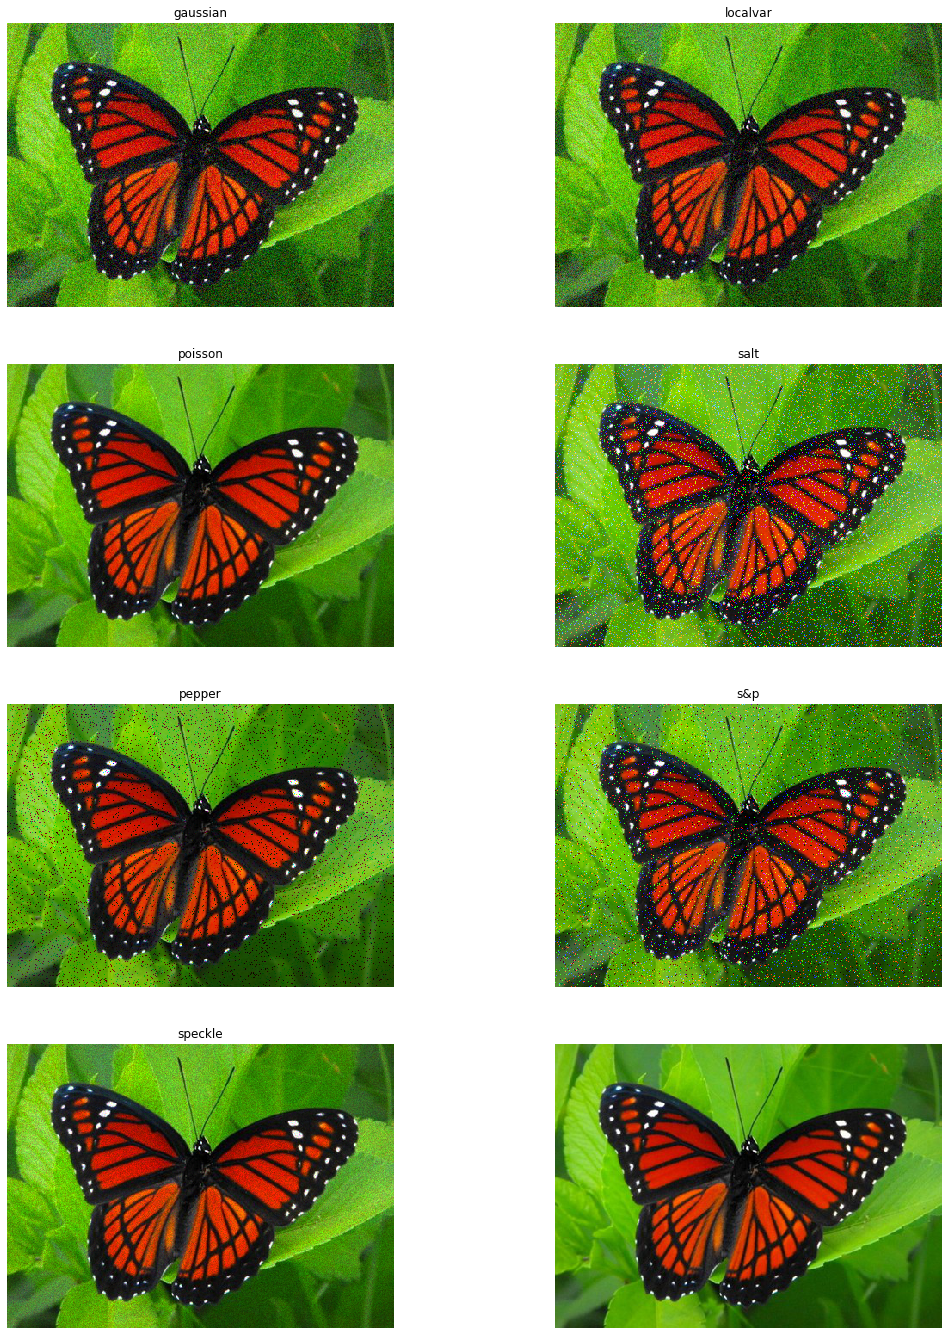

In [11]:
import skimage.io
import matplotlib.pyplot as plt
img_path="imgs/img.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()

## <font color='#7429b3'> Adding Noisewith interaction </font>

In [21]:
import skimage.io
import matplotlib.pyplot as plt

img_path="imgs/img.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(mode):
    img_path="imgs/img.jpg"
    img = skimage.io.imread(img_path)/255.0
    #plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
interact(plotnoise,mode=["Gaussian","Localvar","poisson","salt","pepper","s&p","speckle"]);
"""
plotnoise(img, "gaussian")
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
"""
plt.show()


<Figure size 1296x1728 with 0 Axes>

interactive(children=(Dropdown(description='mode', options=('Gaussian', 'Localvar', 'poisson', 'salt', 'pepper…

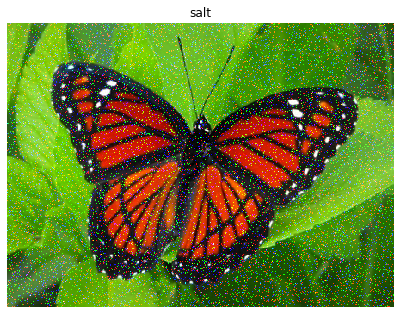

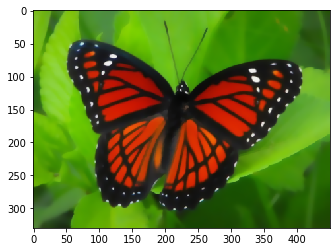

In [22]:
# Apply total variation filter denoising
img_path="imgs/img.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "salt", r,c,4)
plt.show()
denoised_image = denoise_tv_chambolle(img,weight=0.1,multichannel=True)
# Show denoised image
plt.imshow(denoised_image)

In [24]:
!pip3 install  watermark --user

You should consider upgrading via the 'pip install --upgrade pip' command.


In [25]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,numpy,cv2,sklearn.cluster,skimage,matplotlib
# date
print (" ")
%watermark -u -n -t -z

CPython 3.7.3
IPython 7.19.0

pandas 0.24.2
numpy 1.19.3
cv2 4.4.0
sklearn.cluster 0.21.2
skimage 0.15.0
matplotlib 3.1.0

compiler   : GCC 7.3.0
system     : Linux
release    : 5.4.0-52-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit
 
last updated: Fri Nov 13 2020 18:52:04 CET


In [26]:
!python --version

Python 3.7.3
